In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
Corona_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')


In [191]:
Corona_data.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [192]:
# Series 를 이용 , Country/Region 의 카테고리 갯수 확인
pd.Series.value_counts('Country/Region')

Country/Region    14
dtype: int64

In [193]:
train = Corona_data.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max() # (Observation, Country/Region) 그리고 (Confirmed, Deaths, Recoverd)로 그룹화
train = train.reset_index()
train['Date'] = pd.to_datetime(train['ObservationDate'])    # Observation Date 를 새로운 Column -> Date 로 변경
train['Date'] = train['Date'].dt.strftime('%m/%d/%Y')       # 2020/01/22 와 같이 되어 있던 Date를 01/22/2020 와 같이 변경
train['Patients'] = train['Confirmed'] - train['Deaths'] - train['Recovered']   # Patients 라는 새로운 Column 생성, 이는 감염자 수에서 사망자 수와 완치자 수를 뺀 값
train['Country'] = train['Country/Region']                  # Country/Region Column을 Country 로 변경
train.drop(['ObservationDate', 'Confirmed', 'Deaths', 'Recovered', 'Country/Region'], axis=1, inplace=True) # 불필요한 Column 제거

In [194]:
train.head()

Date  Patients         Country
0  01/22/2020       0.0       Hong Kong
1  01/22/2020       2.0           Japan
2  01/22/2020       1.0           Macau
3  01/22/2020     399.0  Mainland China
4  01/22/2020       1.0     South Korea

In [195]:
# NAN Value 검사
for col in train.columns:
    msg = 'column: {:>10}\t Percent Of NAN Value: {:.3f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msg)
    

column:       Date	 Percent Of NAN Value: 0.000%
column:   Patients	 Percent Of NAN Value: 0.000%
column:    Country	 Percent Of NAN Value: 0.000%


In [196]:
"""
fig, ax = plt.subplots()
ax.scatter(x=train['Patients'], y=train['Country'])
plt.xlabel('Patients')
plt.ylabel('Country')
plt.show()
"""

"\nfig, ax = plt.subplots()\nax.scatter(x=train['Patients'], y=train['Country'])\nplt.xlabel('Patients')\nplt.ylabel('Country')\nplt.show()\n"

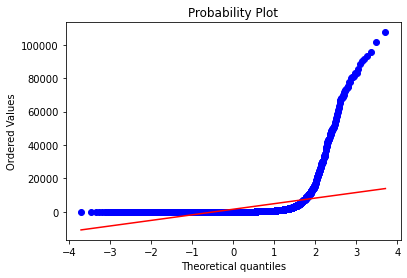

In [197]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(train['Patients'], plot=plt)
plt.show()

In [198]:
f, ax = plt.subplots(figsize =(100, 500))
plt.xticks(([0,1000,2000,3000,4000,5000,10000,15000,20000,25000,30000]),rotation='85', fontsize=50)
plt.yticks(rotation='20', fontsize=50)
sns.barplot(x=train.Patients, y=train.Country)
plt.xlabel('Patients')
plt.ylabel('Country')
plt.show()

In [ ]:
"""
plt.figure(figsize=(300, 200))
plt.bar(train.Date, train.Patients, label='Patients')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(frameon=True, fontsize=200)
plt.title('Count Patients by Date')
plt.show()
"""